<span style="font-size:3em; font-weight:bold;">
             Prédiction du prix de voiture

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import plotly.express as px
%matplotlib inline

<span style="font-size:2em; font-weight:bold;">Visualisation et data cleaning</span>

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#inutile une sorte d'index
df = df.drop("car_ID", axis=1)

In [5]:
df.shape

(205, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
#colonnes non-catégorielles.
df_num = df.select_dtypes(include=['int64', 'float64'])

In [9]:
df_num

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
nums = df_num.columns

In [11]:
nums

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
df_num['price'].nunique()

189

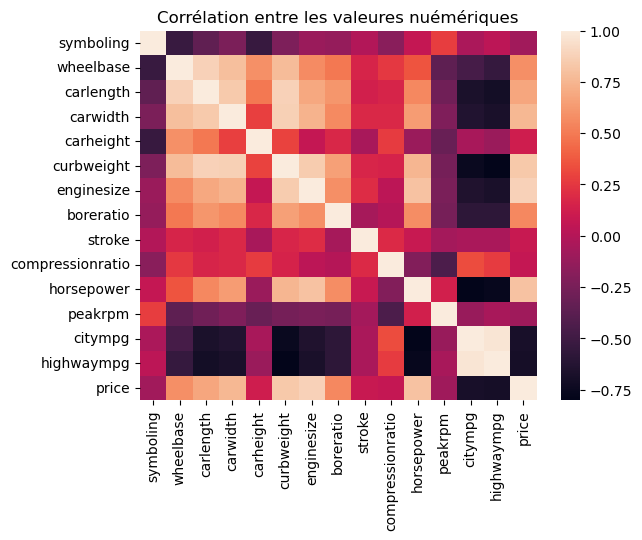

In [13]:
#Corrélation entre chaque col numériques
sns.heatmap(df_num.corr())
plt.title('Corrélation entre les valeures nuémériques')
plt.show()

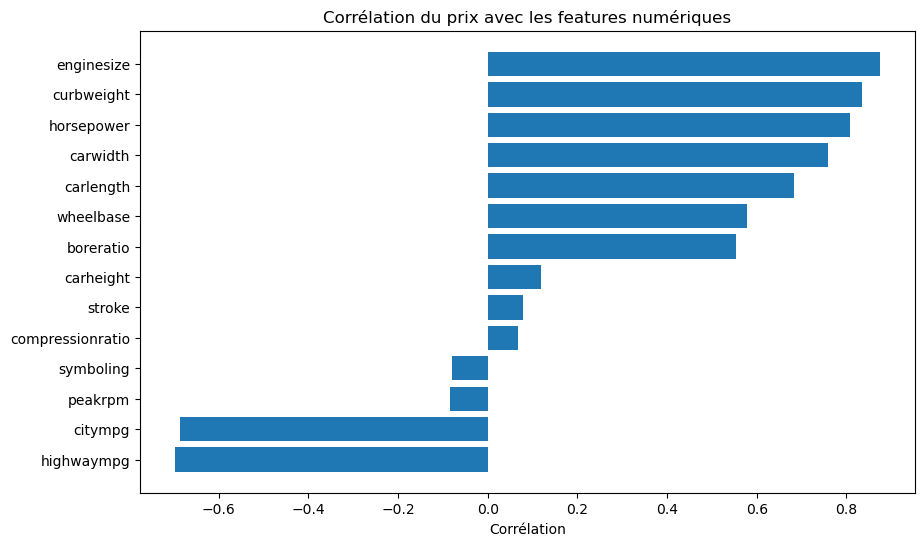

In [14]:
#Corrélation des colonnes numériques avec price (ce qui nous intéresse)
corrs = (df_num.drop('price',axis=1)).corrwith(df_num['price']).sort_values()

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(corrs.index, corrs.values)
ax.set_xlabel('Corrélation')
ax.set_title('Corrélation du prix avec les features numériques')
plt.show()

<span style="font-size:1.25em; font-weight:bold;">
    Un peu de nettoyage

In [15]:
df['CarName'].nunique()

147

In [16]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [17]:
# #On note toutes les marques de véhicules
# alfa, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda(maxda), buick, mercury, mitsubishi, Nissan(nissan), peugeot, plymouth, porsche(porcshe), renault, saab, subaru, toyota(toyouta), volkswagen(vw, vokswagen) volvo  

In [18]:
#on prend un dictionnaire qui prend en compte les erreurs de saisie.
brands = {
    'alfa': ['alfa'],
    'audi': ['audi'],
    'bmw': ['bmw'],
    'chevrolet': ['chevrolet'],
    'dodge': ['dodge'],
    'honda': ['honda'],
    'isuzu': ['isuzu'],
    'jaguar': ['jaguar'],
    'mazda': ['mazda', 'maxda'],
    'buick': ['buick'],
    'mercury': ['mercury'],
    'mitsubishi': ['mitsubishi'],
    'nissan': ['nissan', 'Nissan'],
    'peugeot': ['peugeot'],
    'plymouth': ['plymouth'],
    'porsche': ['porsche', 'porcshe', 'porcshce'],
    'renault': ['renault'],
    'saab': ['saab'],
    'subaru': ['subaru'],
    'toyota': ['toyota', 'toyouta'],
    'volkswagen': ['volkswagen', 'vw', 'vokswagen'],
    'volvo': ['volvo']
}

def set_mark(car_name):
    for brand, variants in brands.items():
        for variant in variants:
            if variant in car_name.lower():
                return brand
    return None

df['mark'] = df['CarName'].apply(set_mark)

In [19]:
#on traite la ou on a pas réussi attribué de marque pour les ajouter dans le dictionnaire
df[df['mark'].isna()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mark


In [20]:
df.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mark
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa


In [21]:
#Colonnes catégorielles
df_cat = df.select_dtypes(include=['object'])

In [22]:
#On enlève car trop facile en effet, Lamborghini, 308 etc suffisent à établir le prix..et y'a plus de ML
#à faire
df_cat = df_cat.drop('CarName', axis=1)

In [23]:
cols = df_cat.columns

In [24]:
cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'mark'],
      dtype='object')

In [25]:
#Distribution conditionnelle des colonnes catégorielles. P(Y|Xd)

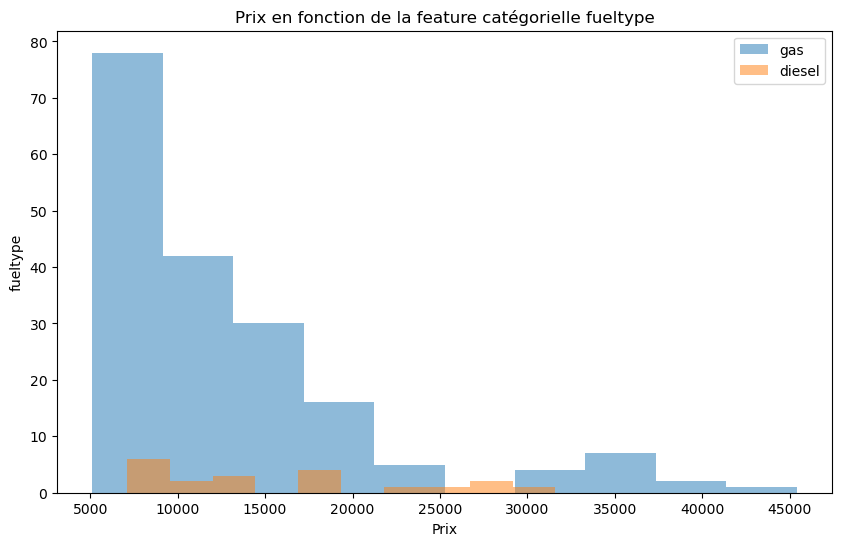

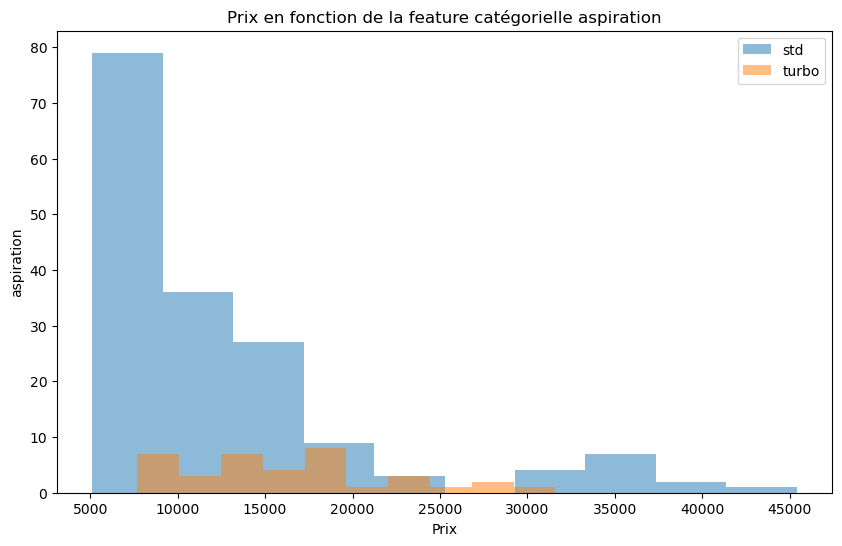

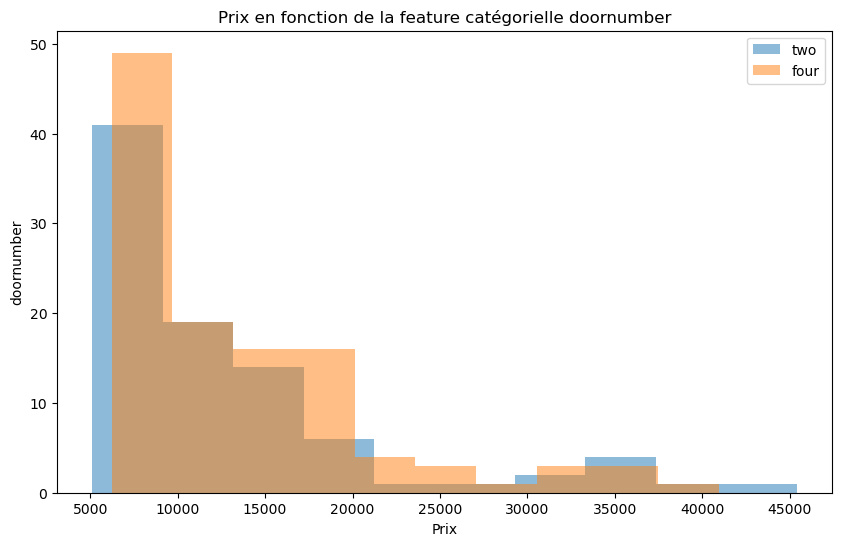

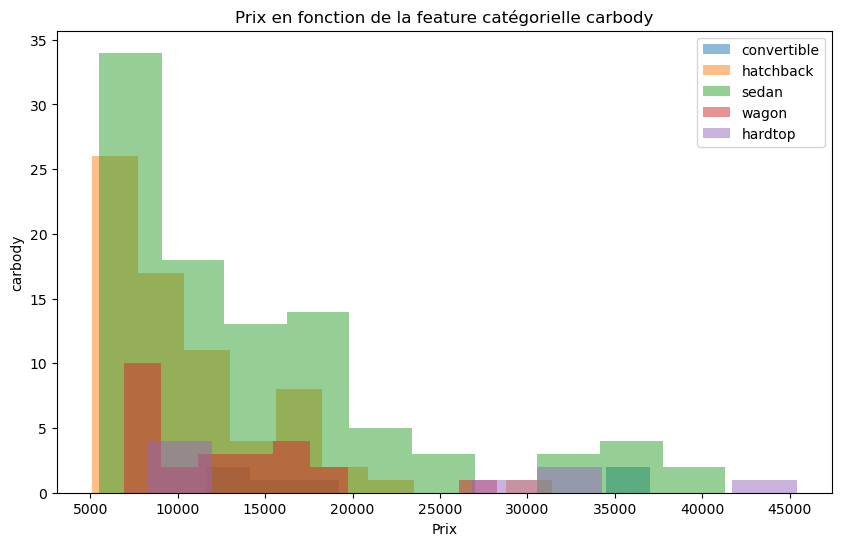

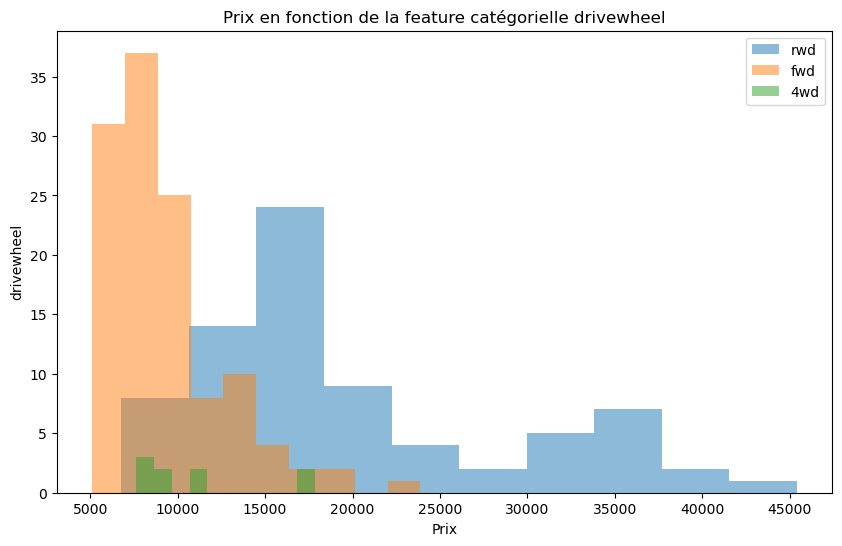

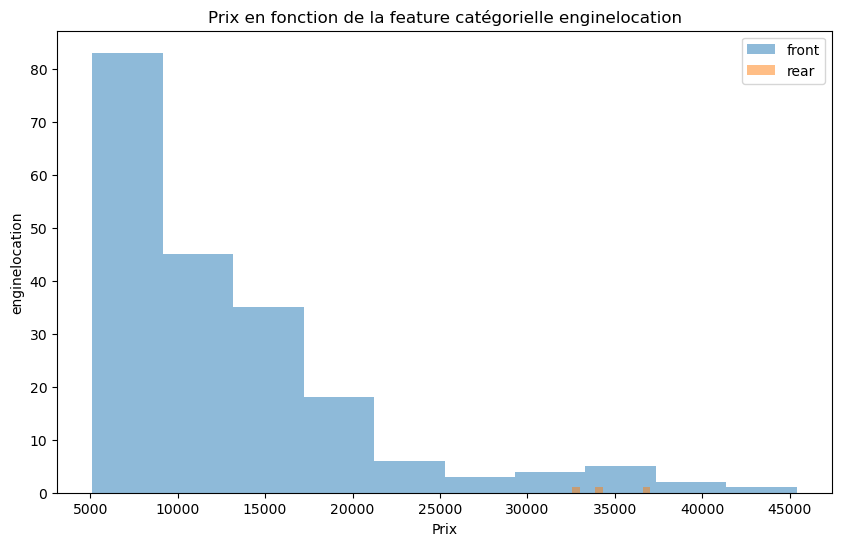

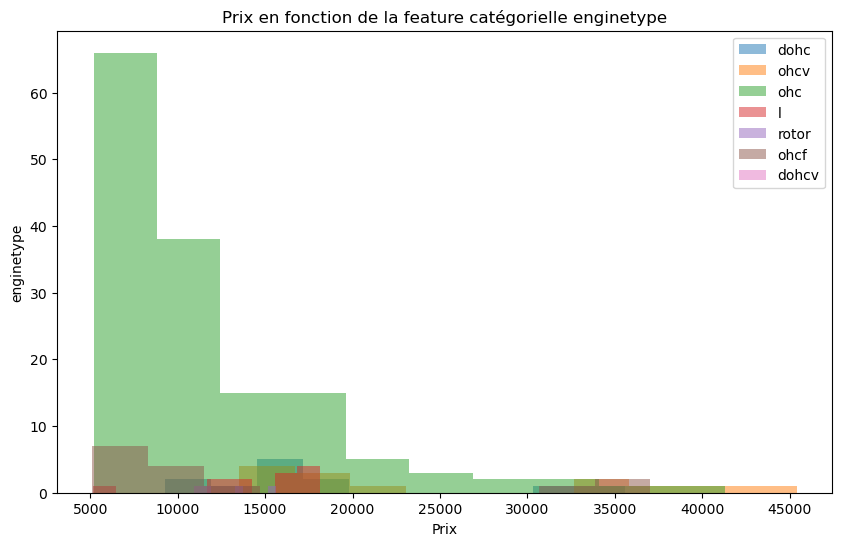

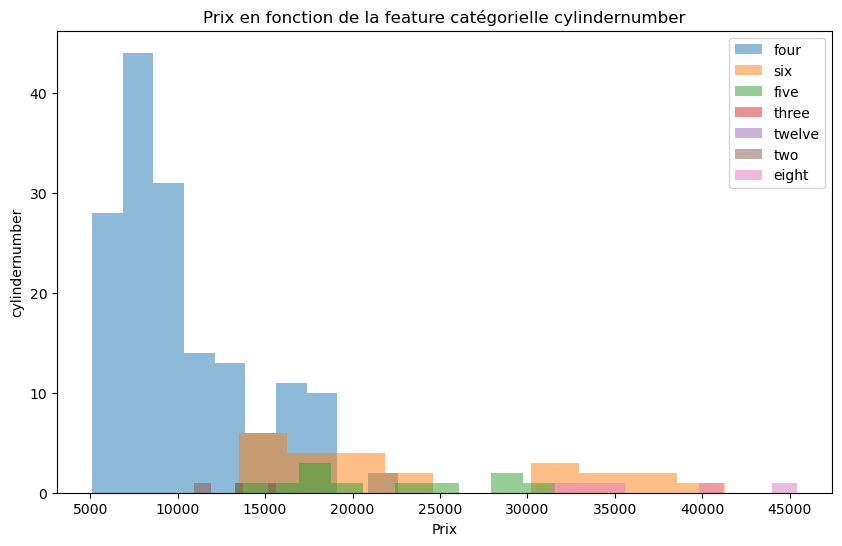

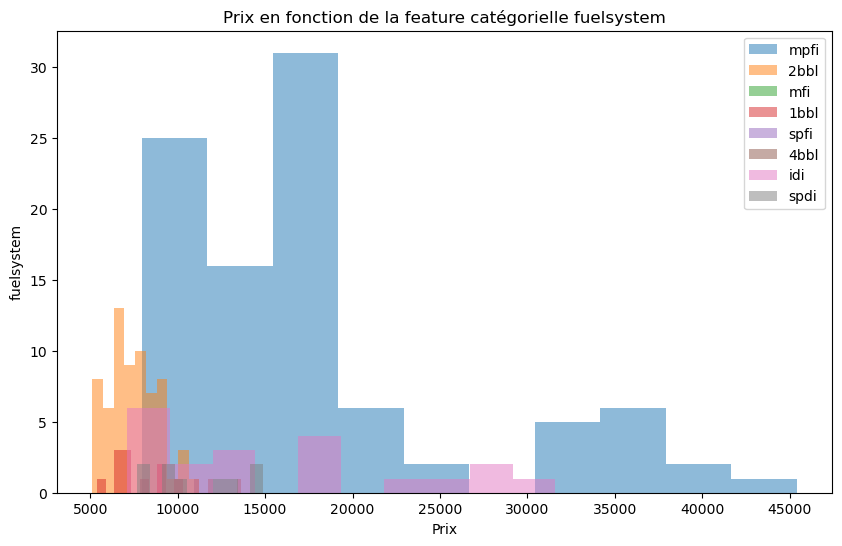

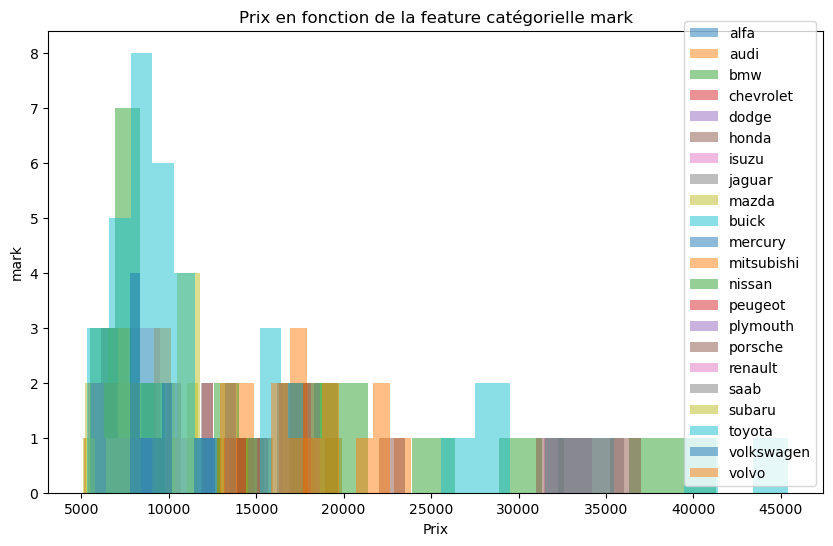

In [26]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    values = df[col].unique()
    for value in values:
        prices = df[df[col]==value]['price']
        ax.hist(prices, alpha=0.5, label=value)
    ax.set_title('Prix en fonction de la feature catégorielle {}'.format(col))
    ax.set_xlabel('Prix')
    ax.set_ylabel(col)
    ax.legend()
    plt.show()

Prévisible déja on remarque qu'il n'y a pas beaucoup de voitures très et que certaines
variables ont des valeurs presques absentes.

<span style="font-size:2em; font-weight:bold;">
Feature Engineering (Encoding)

In [27]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'mark'],
      dtype='object')

In [28]:
#On enlève CarName du dataframe final (on l'avait fait que pour cat)
df_clean = df.drop("CarName", axis=1)

In [29]:
#vérifie qu'il est parti
len(df_clean.columns)

25

In [30]:
df_clean.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mark
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa


Implémentons nous même le OneHot

In [31]:
def encodageOneHot(df):
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    
    encoded_dfs = []
    
    for col in categorical_cols:
        
        unique_values = df[col].unique()
        
        for value in unique_values:
            new_col_name = f"{col}={value}"
            df[new_col_name] = (df[col] == value).astype(int)
    
        df.drop(col, axis=1, inplace=True)
    
    return df

In [32]:
df_encod = encodageOneHot(df_clean)

On test si on retrouve la même qu'avec get_dummies

In [33]:
df_encod_test = pd.get_dummies(df_clean, prefix_sep='=')
df_encod.equals(df_encod_test)

True

In [34]:
df_encod.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mark=nissan,mark=peugeot,mark=plymouth,mark=porsche,mark=renault,mark=saab,mark=subaru,mark=toyota,mark=volkswagen,mark=volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


Notre dataset est tout propre, c'est parti !

<span style="font-size:2em; font-weight:bold;">Séparation des données</span>

On oublie pas de séparer avant le Pre_Proc.

In [35]:
train_data, test_data = train_test_split(df_encod, test_size=0.2, random_state=0)
trainval_data, val_data = train_test_split(train_data, test_size=0.25, random_state=0)

In [36]:
train_data.shape, trainval_data.shape, test_data.shape, val_data.shape

((164, 75), (123, 75), (41, 75), (41, 75))

<span style="font-size:2em; font-weight:bold;">Pre_processing</span>

<span style="font-size:1.25em; font-weight:bold;">Standardisation</span>

In [37]:
#STANDARDISATION
def Standardisation_w_validation(train , test, validation):
    means = train[nums].mean() #fit
    stds = train[nums].std()

    train[nums] = (train[nums] - means) / stds #transform
    test[nums] = (test[nums] - means) / stds
    validation[nums] = (validation[nums] - means) / stds

In [38]:
def Standardisation(train, test):
    means = train[nums].mean() #fit
    stds = train[nums].std()

    train[nums] = (train[nums] - means) / stds #transform
    test[nums] = (test[nums] - means) / stds

In [39]:
#On standardise pou rla régressions de tout à l'heure.
Standardisation_w_validation(trainval_data, test_data, val_data)

In [40]:
trainval_data.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mark=nissan,mark=peugeot,mark=plymouth,mark=porsche,mark=renault,mark=saab,mark=subaru,mark=toyota,mark=volkswagen,mark=volvo
42,0.174753,-0.408078,-0.466605,-0.003386,-1.145478,-0.554424,-0.432519,-0.665826,1.031277,-0.302681,...,0,0,0,0,0,0,0,0,0,0
14,0.174753,0.755350,1.190307,0.413076,0.716729,0.890143,0.819241,-0.087307,-0.250837,-0.325619,...,0,0,0,0,0,0,0,0,0,0


In [41]:
val_data.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mark=nissan,mark=peugeot,mark=plymouth,mark=porsche,mark=renault,mark=saab,mark=subaru,mark=toyota,mark=volkswagen,mark=volvo
174,-1.478677,0.572526,0.074597,0.227982,0.399758,-0.199918,-0.432519,-0.231937,0.275159,2.770939,...,0,0,0,0,0,0,0,1,0,0
166,0.174753,-0.740486,-0.499910,-0.928856,-0.511535,-0.541154,-0.710687,-0.340409,-0.612459,-0.233869,...,0,0,0,0,0,0,0,1,0,0


In [42]:
test_data.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mark=nissan,mark=peugeot,mark=plymouth,mark=porsche,mark=renault,mark=saab,mark=subaru,mark=toyota,mark=volkswagen,mark=volvo
52,0.174753,-0.973172,-1.299224,-0.836309,0.082786,-1.289978,-0.872952,-1.099715,-0.382336,-0.325619,...,0,0,0,0,0,0,0,0,0,0
181,-1.478677,0.921554,1.090393,0.227982,0.082786,1.072136,0.749699,-0.231937,0.275159,-0.279744,...,0,0,0,0,0,0,0,1,0,0


On récupère la target colonne.

In [43]:
 #SEP FEATURES TARGET
target_col = "price"
X_trainval = trainval_data.drop(target_col, axis=1)
y_trainval = trainval_data[target_col]

X_testval = test_data.drop(target_col, axis=1)
y_testval = test_data[target_col]

X_val = val_data.drop(target_col, axis=1)
y_val = val_data[target_col]

In [44]:
X_trainval.shape, y_trainval.shape, X_testval.shape, y_testval.shape, X_val.shape, y_val.shape

((123, 74), (123,), (41, 74), (41,), (41, 74), (41,))

<span style="font-size:1.25em; font-weight:bold;">PCA</span>

Dans un premier nous allons faire des visualisations avec le PCA.

In [45]:
#AFFICHAGE DES DONNEES AVEC LE PCA

In [46]:
Standardisation(train_data, test_data)

In [47]:
X_train_visu = train_data.drop(target_col, axis=1)
y_train_visu = train_data[target_col]

X_test_visu = test_data.drop(target_col, axis=1)
y_test_visu = test_data[target_col]

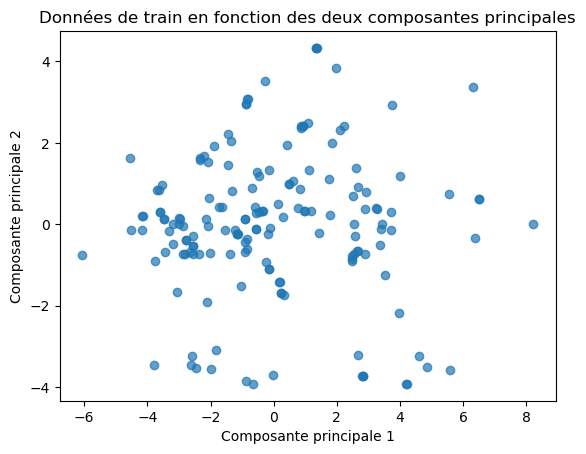

In [48]:
#Données d'entrainement affichées avec les deux composantes principales.
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_visu)

plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], alpha=0.7)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Données de train en fonction des deux composantes principales')
plt.show()

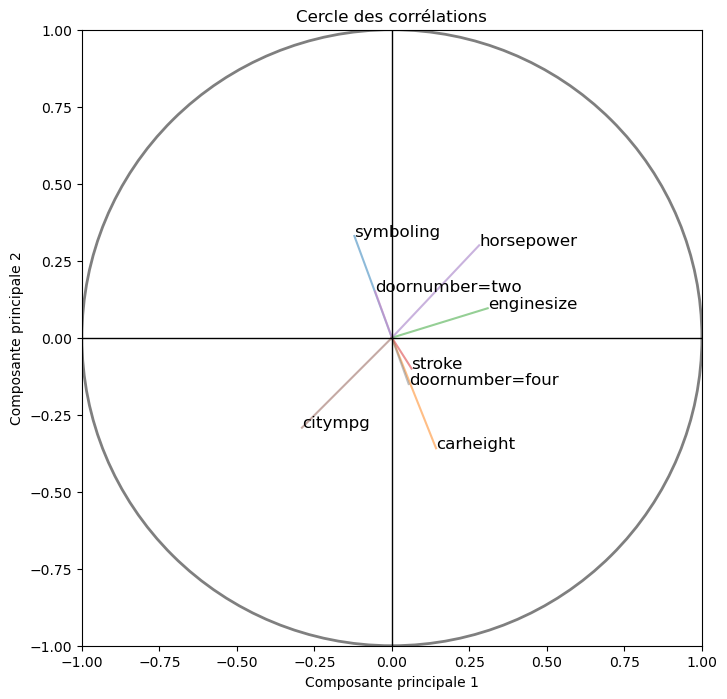

In [49]:
corr_matrix = pd.DataFrame(pca_2d.components_.T, index=X_train_visu.columns, columns=['PC1', 'PC2'])

fig, ax = plt.subplots(figsize=(8, 8))

for idx in corr_matrix.index:
    if idx in ['stroke', 'citympg', 'carheight', 'fueltype_gas', 'enginesize', 'symboling', 'horsepower', 'doornumber=two', 'doornumber=four']:
        ax.plot([0, corr_matrix.loc[idx, 'PC1']], [0, corr_matrix.loc[idx, 'PC2']], alpha=0.5)
        ax.text(corr_matrix.loc[idx, 'PC1'], corr_matrix.loc[idx, 'PC2'], idx, fontsize=12)

circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2, alpha=0.5)
ax.add_artist(circle)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_title('Cercle des corrélations')

ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

plt.show()

<span style="font-size:1.25em; font-weight:bold;">Bonus PCA(méthodes d'optimisation sans modèle)</span>

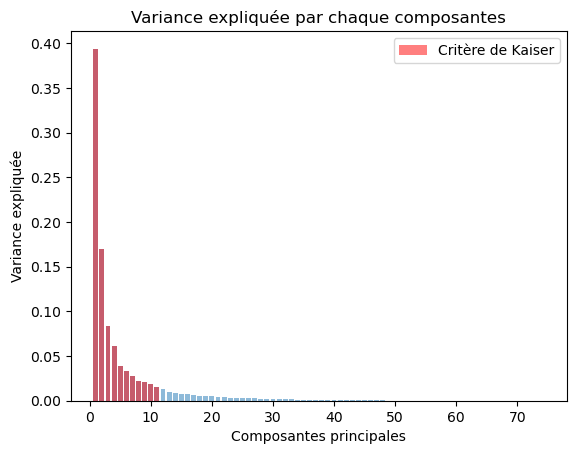

In [50]:
pca_plot = PCA()
pca_plot.fit(X_train_visu)

explained_variance_ratio = pca_plot.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

n = len(explained_variance_ratio)
kaiser = 1 / n  # seuil de 100/K %

important_indices = [i for i, evr in enumerate(explained_variance_ratio) if evr > kaiser]

num_important_pcs = len(important_indices)

plt.bar(range(1, n + 1), explained_variance_ratio, alpha=0.5)

plt.bar([i + 1 for i in important_indices], explained_variance_ratio[important_indices], color='red', alpha=0.5, label='Critère de Kaiser')

plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title(f'Variance expliquée par chaque composantes')
plt.legend()

plt.show()


In [51]:
len(important_indices)

11

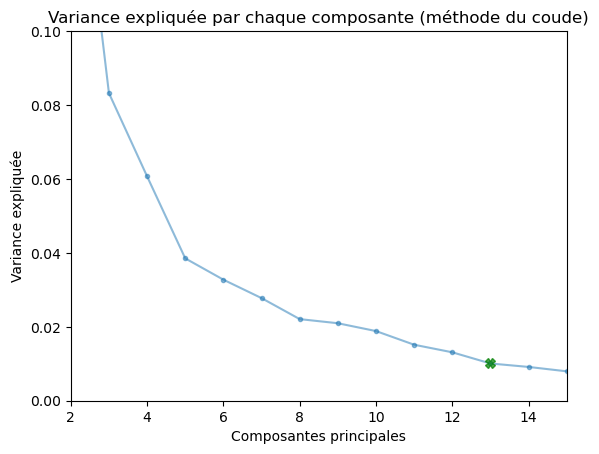

In [52]:
#Méthode du coude
plt.plot(range(1, n + 1), explained_variance_ratio, marker='o',markersize = 3, linestyle='-', alpha=0.5)
#point optimal
plt.plot(13, explained_variance_ratio[12], marker='X', color='green', markersize=7, alpha=0.7)

plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par chaque composante (méthode du coude)')
plt.xlim([2, 15])
plt.ylim([0,0.1])

plt.show()

In [53]:
#Dans cette méthode on cherche le point ou l'inertie (=somme des variances, autrement dit une variance multidimensionelle) diminue plus lentement

In [54]:
#Valeur selon la méthode du coude.
print(13)

13


<span style="font-size:2em; font-weight:bold;">Régression Linéaire</span>

On commence avec un nombre arbitraire de n_components

In [55]:
####################PCA
pca = PCA(n_components=5)
pca.fit(X_trainval)

X_trainval_pca = pca.transform(X_trainval)
X_val_pca = pca.transform(X_val)

In [56]:
#####premiere regression linéaire
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_trainval_pca, y_trainval)

LinearRegression()

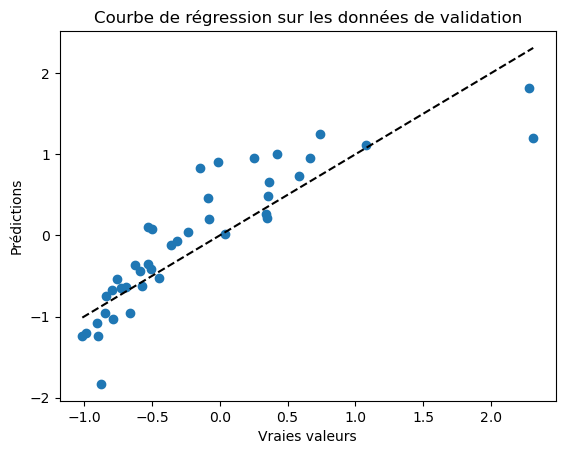

In [57]:
y_pred_val = reg.predict(X_val_pca)

plt.scatter(y_val, y_pred_val)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Courbe de régression sur les données de validation')
plt.show()

In [58]:
#Bof quoi sans opti ... voyons les metrics.

In [59]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred_val)

print("MSE Val: {:.2f}".format(mse))
print("RMSE Val: {:.2f}".format(rmse))
print("R^2 Val:", reg.score(X_val_pca, y_val))
print("R^2 Train:", reg.score(X_trainval_pca, y_trainval))

MSE Val: 0.18
RMSE Val: 0.43
R^2 Val: 0.6962906068068699
R^2 Train: 0.8197399259996356


In [60]:
#généralise pas bien, tentons de chercher un n_components qui améliore nos scores
#de val.

<span style="font-size:1.25em; font-weight:bold;">Optimisation de n_components</span>

In [61]:
################"OPTIMISATION PCA REGRESSION
max_n_components = 50


train_scores = []
val_scores = []
mse_scores = []

for n_components in range(1, max_n_components+1):
    pca = PCA(n_components=n_components)
    X_trainval_pca = pca.fit_transform(X_trainval)
    X_val_pca = pca.transform(X_val)

    reg = LinearRegression()
    reg.fit(X_trainval_pca, y_trainval)

    train_score = reg.score(X_trainval_pca, y_trainval)
    train_scores.append(train_score)

    val_score = reg.score(X_val_pca, y_val)
    val_scores.append(val_score)

    y_val_pred = reg.predict(X_val_pca)
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)
    
    if(n_components < 10):
        print(f"n_components: {n_components}")
        print(f"Train score: {train_score:.2f}")
        print(f"Val score: {val_score:.2f}")
        print(f"MSE: {mse:.2f}")
        print("-"*20)


n_components: 1
Train score: 0.74
Val score: 0.49
MSE: 0.30
--------------------
n_components: 2
Train score: 0.76
Val score: 0.57
MSE: 0.26
--------------------
n_components: 3
Train score: 0.77
Val score: 0.64
MSE: 0.22
--------------------
n_components: 4
Train score: 0.77
Val score: 0.64
MSE: 0.21
--------------------
n_components: 5
Train score: 0.82
Val score: 0.70
MSE: 0.18
--------------------
n_components: 6
Train score: 0.85
Val score: 0.74
MSE: 0.15
--------------------
n_components: 7
Train score: 0.85
Val score: 0.74
MSE: 0.15
--------------------
n_components: 8
Train score: 0.85
Val score: 0.74
MSE: 0.16
--------------------
n_components: 9
Train score: 0.86
Val score: 0.75
MSE: 0.15
--------------------


In [62]:
#On affiche les figures de R² score pour chercher le meilleur point.

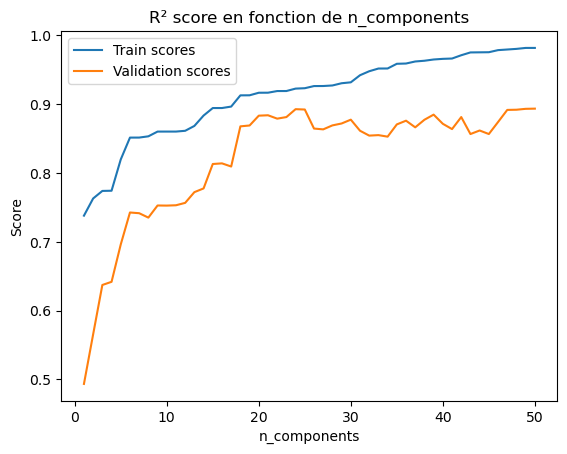

In [63]:
plt.plot(range(1, max_n_components+1), train_scores, label='Train scores')
plt.plot(range(1, max_n_components+1), val_scores, label='Validation scores')
plt.xlabel('n_components')
plt.ylabel('Score')
plt.title('R² score en fonction de n_components')
plt.legend()
plt.show()

In [64]:
#Affichage du meilleur point.

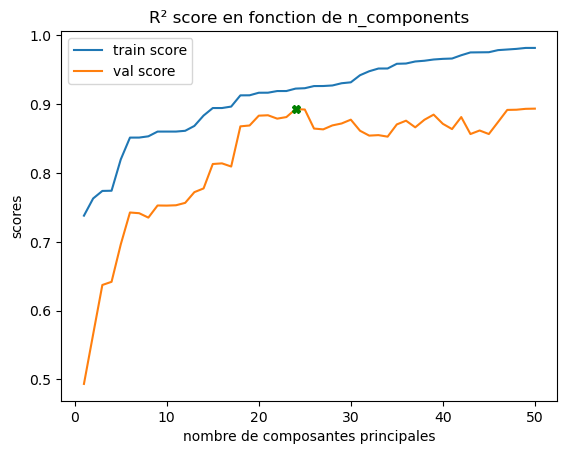

In [65]:
nComp =  range(1, max_n_components+1)
plt.figure()
plt.plot( nComp, train_scores, label="train score")
plt.plot( nComp, val_scores, label="val score")
plt.xlabel("nombre de composantes principales")
plt.ylabel("scores")

bestIndex = np.argmax(val_scores[:30])
bestNC = nComp[bestIndex]
plt.plot(bestNC, val_scores[bestIndex], marker='X', color='green')
plt.legend()
plt.title('R² score en fonction de n_components')

plt.show()

In [66]:
print("Le nombre de components optimal est", bestNC)

Le nombre de components optimal est 24


In [67]:
X_trainval.shape, X_testval.shape

((123, 74), (41, 74))

In [68]:
###########PCA with best n_components
from sklearn.decomposition import PCA

pca = PCA(n_components=bestNC)
pca.fit(X_trainval)

X_trainval_pca = pca.transform(X_trainval)
X_val_pca = pca.transform(X_val)
X_testval_pca = pca.transform(X_testval)

In [69]:
X_trainval_pca.shape , X_testval_pca.shape, X_val_pca.shape

((123, 24), (41, 24), (41, 24))

In [70]:
reg = LinearRegression()
reg.fit(X_trainval_pca, y_trainval)

LinearRegression()

In [71]:
y_pred_testval = reg.predict(X_testval_pca)

mse = mean_squared_error(y_testval, y_pred_testval)
mse = mean_absolute_error(y_testval, y_pred_testval)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_testval, y_pred_testval)

print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("R^2 :", reg.score(X_testval_pca, y_testval))

MSE: 0.27
MAE: 0.27
RMSE: 0.52
R^2 : 0.8592757772776203


<span style="font-size:1.25em; font-weight:bold;">Optimisation n_components avec Cross Validation (sans cross_validate, à la main avec Kfold)</span>

In [72]:
#On dit resplit car on doit restandardiser et notre fonction prend train et test directement en param.
train_data, test_data = train_test_split(df_encod, test_size=0.2, random_state=0)

In [73]:
X_train = train_data.drop(target_col, axis=1)
y_train = train_data[target_col]

X_test = test_data.drop(target_col, axis=1) 
y_test = test_data[target_col]

In [74]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape 

((164, 74), (41, 74), (164,), (41,))

In [75]:
#vérif que c'est pas déjà standardiser.
X_test.head(1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mark=nissan,mark=peugeot,mark=plymouth,mark=porsche,mark=renault,mark=saab,mark=subaru,mark=toyota,mark=volkswagen,mark=volvo
52,1,93.1,159.1,64.2,54.1,1905,91,3.03,3.15,9.0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
X_train.head(1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mark=nissan,mark=peugeot,mark=plymouth,mark=porsche,mark=renault,mark=saab,mark=subaru,mark=toyota,mark=volkswagen,mark=volvo
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,...,0,0,0,0,0,0,0,0,0,0


Alogorithme de recherche de n_components

In [77]:
from sklearn.model_selection import cross_val_score, KFold
max_n_components = 65
n_components_range = range(1, max_n_components+1)

all_train_scores = {n: [] for n in n_components_range}
all_val_scores = {n: [] for n in n_components_range}
final_train_scores = []
final_val_scores = []

linear_model = LinearRegression()
kfold = KFold(n_splits=5)

for n_components in n_components_range:
    train_scores = []
    val_scores = []

    for train_idx, val_idx in kfold.split(X_train):  
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Concaténation des X et y pour la standardisation.
        train_data_fold = pd.concat([X_train_fold, y_train_fold], axis=1)
        val_data_fold = pd.concat([X_val_fold, y_val_fold], axis=1)

        # Standardisation
        Standardisation(train_data_fold, val_data_fold)

        # Séparation des X et y standardisés
        X_train_std, y_train_std = train_data_fold.drop(target_col, axis=1), train_data_fold[target_col]
        X_val_std, y_val_std = val_data_fold.drop(target_col, axis=1), val_data_fold[target_col]

        # PCA
        pca = PCA(n_components=n_components)
        pca.fit(X_train_std)
        X_train_pca = pca.transform(X_train_std)
        X_val_pca = pca.transform(X_val_std)

        # Linear Regression
        linear_model.fit(X_train_pca, y_train_std)
        
        train_score = linear_model.score(X_train_pca, y_train_std)
        val_score = linear_model.score(X_val_pca, y_val_std)
        
        train_scores.append(train_score)
        val_scores.append(val_score)

    all_train_scores[n_components] = train_scores
    all_val_scores[n_components] = val_scores

    mean_train_score = np.mean(train_scores)
    mean_val_score = np.mean(val_scores)

    final_train_scores.append(mean_train_score)
    final_val_scores.append(mean_val_score)

# Les scores pour chaque fold de cross-validation sont stockés dans all_train_scores et all_val_scores
# Les scores d'entraînement et de validation finaux sont stockés dans final_train_scores et final_val_scores

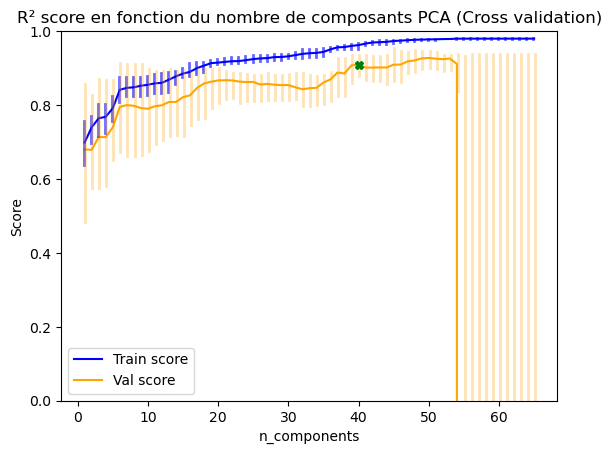

In [78]:
plt.plot(n_components_range, final_train_scores, label='Train score', color='blue')
plt.plot(n_components_range, final_val_scores, label='Val score', color='orange')

for idx, n_components in enumerate(n_components_range):
    min_train_score, max_train_score = min(all_train_scores[n_components]), max(all_train_scores[n_components])
    min_val_score, max_val_score = min(all_val_scores[n_components]), max(all_val_scores[n_components])

    plt.plot([n_components - 0.1, n_components - 0.1], [min_train_score, max_train_score], color='blue', alpha=0.6, linewidth=2)
    plt.plot([n_components + 0.1, n_components + 0.1], [min_val_score, max_val_score], color='orange', alpha=0.3, linewidth=2)

plt.xlabel('n_components')
plt.ylabel('Score')
plt.title('R² score en fonction du nombre de composants PCA (Cross validation)')
plt.ylim([0, 1])

bestIndex = np.argmax(final_val_scores[:44])
best_n_components = n_components_range[bestIndex]
plt.plot(best_n_components, final_val_scores[bestIndex], marker='X', color='green')

plt.legend()
plt.show()

In [79]:
#la grande descente est du à la grande variance lorsque l'on a beaucoup de composantes, celle-ci est également du aux
#peu d'échantillons qu'on a, on est complétement dans de l'overfitting. 

In [80]:
best_n_components

40

<span style="font-size:1.25em; font-weight:bold;">Déploiement du modèle</span>

In [81]:
#On standardise pour refaire le PCA.
Standardisation(train_data, test_data)
X_train = train_data.drop(target_col, axis=1)
y_train = train_data[target_col]

X_test = test_data.drop(target_col, axis=1) 
y_test = test_data[target_col]

In [82]:
#On refait le PCA avec le nombre adéquat de n_components.
pca = PCA(n_components=best_n_components)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [83]:
X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape

((164, 40), (164,), (41, 40), (41,))

In [84]:
regcv = LinearRegression()
regcv.fit(X_train_pca, y_train)

y_pred_test_regcv = regcv.predict(X_test_pca)

regcv_mse = mean_squared_error(y_test, y_pred_test_regcv)
regcv_rmse = np.sqrt(mse)
regcv_mae = mean_absolute_error(y_test, y_pred_test_regcv)
regcv_score =  regcv.score(X_test_pca, y_test)

print("MSE: {:.2f}".format(regcv_mse))
print("MAE: {:.2f}".format(regcv_mse))
print("RMSE: {:.2f}".format(regcv_rmse))
print("R^2 :", regcv.score(X_test_pca, y_test))

MSE: 0.15
MAE: 0.15
RMSE: 0.52
R^2 : 0.8800052516935475


<span style="font-size:2em; font-weight:bold;">Ridge Regression (régression avec pénalisation L2) </span>


Ridge est une régression linéaire avec hyperparamètre qui vise à régler nous même la
courbe de régression avec un hyperparamètre qui agit sur la fonction cout. Le but est 
de mieux contrôler l'overfitting sans nécessairement tomber dans l'underfitting avec des pénalisations trop grandes.

On commence sans cross validation.

In [85]:
from sklearn.linear_model import Ridge

In [86]:
#On resplit car on va re standardiser ( toujours en respectant la pipeline)
#Grace à random_state fixe on aura toujours la même répartition des données.
train_data, test_data = train_test_split(df_encod, test_size=0.2, random_state=0)
trainval_data, val_data = train_test_split(train_data, test_size=0.25, random_state=0)

In [87]:
Standardisation_w_validation(trainval_data, test_data, val_data)
X_trainval = trainval_data.drop(target_col, axis=1)
y_trainval = trainval_data[target_col]

X_testval = test_data.drop(target_col, axis=1)
y_testval = test_data[target_col]

X_val = val_data.drop(target_col, axis=1)
y_val = val_data[target_col]

In [88]:
pca = PCA(n_components=5)
pca.fit(X_trainval)

X_trainval_pca = pca.transform(X_trainval)
X_val_pca = pca.transform(X_val)

In [89]:
#premier essai avec un nombre arbitraire de n_components et d'alpha.

In [90]:
#ridge avec alpha arbitraire.

ridge_model = Ridge(alpha=100)

ridge_model.fit(X_trainval_pca, y_trainval)
print("R^2 :", ridge_model.score(X_val_pca, y_val))
print("R^2 :", ridge_model.score(X_trainval_pca, y_trainval))

R^2 : 0.6996602542617252
R^2 : 0.7965686172291333


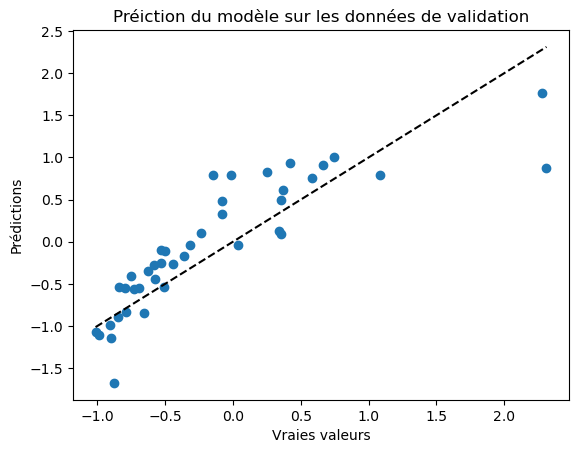

In [91]:
y_rpred_val = ridge_model.predict(X_val_pca)

plt.scatter(y_val, y_rpred_val)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Préiction du modèle sur les données de validation')
plt.show()

In [92]:
#Les résultats sont bof ... optimisons ca

In [93]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold

In [94]:
#Comme nous n'avons pas plus de deux Hyperparamètres nous allons faire une double
#optimisation, (par combinaison)

In [95]:
ridge_train_scores = []
ridge_val_scores = []
ridge_mse_scores = []
n_components_arr = np.arange(1, max_n_components+1)
max_alpha = 10
alpha_arr = np.logspace(-4, 5, num=10) 
best_score = 0
best_nc = 0
best_alpha = 0

#listes pour l'affcihage 2D en fonction d'alpha.
train_scores_r_disp = [[] for i in range(len(alpha_arr))]
val_scores_r_disp = [[] for i in range(len(alpha_arr))]

for n_components in n_components_arr:
    pca = PCA(n_components=n_components)
    X_trainval_pca = pca.fit_transform(X_trainval)
    X_val_pca = pca.transform(X_val)

    for i,alpha in enumerate(alpha_arr):
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_trainval_pca, y_trainval)
        
        train_score = ridge_model.score(X_trainval_pca, y_trainval)
        val_score = ridge_model.score(X_val_pca, y_val)
        
        ridge_train_scores.append(train_score)
        ridge_val_scores.append(val_score)
        
        train_scores_r_disp[i].append(train_score)
        val_scores_r_disp[i].append(val_score)
        
        if(val_score > best_score):
            best_score = val_score
            best_nc = n_components
            best_alpha = alpha
        
        if  (alpha==1)&(n_components<10): #affiche quelques un
            print(f"n_components: {n_components}")
            print(f"alpha: {alpha}")
            print(f"Train score: {train_score:.2f}")
            print(f"Val score: {val_score:.2f}")
            print("-"*20)

n_components: 1
alpha: 1.0
Train score: 0.74
Val score: 0.49
--------------------
n_components: 2
alpha: 1.0
Train score: 0.76
Val score: 0.57
--------------------
n_components: 3
alpha: 1.0
Train score: 0.77
Val score: 0.64
--------------------
n_components: 4
alpha: 1.0
Train score: 0.77
Val score: 0.64
--------------------
n_components: 5
alpha: 1.0
Train score: 0.82
Val score: 0.70
--------------------
n_components: 6
alpha: 1.0
Train score: 0.85
Val score: 0.74
--------------------
n_components: 7
alpha: 1.0
Train score: 0.85
Val score: 0.74
--------------------
n_components: 8
alpha: 1.0
Train score: 0.85
Val score: 0.74
--------------------
n_components: 9
alpha: 1.0
Train score: 0.86
Val score: 0.75
--------------------


In [96]:
len(train_scores_r_disp), len(val_scores_r_disp)

(10, 10)

In [97]:
#premier apercu du meilleur score.
best_score , best_nc, best_alpha

(0.9051828658063588, 54, 1.0)

In [98]:
len(ridge_train_scores), len(ridge_val_scores)

(650, 650)

In [99]:
ridge_train_scores_arr = np.array(ridge_train_scores)
ridge_val_scores_arr = np.array(ridge_val_scores)

In [100]:
def affichage3D_NC_Alpha(elev, azim):
    from mpl_toolkits.mplot3d import Axes3D
    #%matplotlib widget pour la déplacer (assez couteux donc je l'ai commentée pour rester en inline)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    bestScore = 0
    tab_bs = []
    
    #on a les scores sur une liste ou index = couple_nc_alpha(index, index)
    cpt= 0
    
    for i in range(len(n_components_arr)):
        bestScore_bis = 0
        for j in range(len(alpha_arr)):
            ax.scatter(alpha_arr[j], n_components_arr[i], ridge_train_scores_arr[cpt], c='b', label='Train')
            ax.scatter(alpha_arr[j], n_components_arr[i], ridge_val_scores_arr[cpt], c ='orange', label='Validation')
            cpt+=1
       
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('alpha')
    ax.set_ylabel('n_components')
    ax.set_zlabel('Score')
    plt.title('    Score en fonction d\'alpha et n_components pour différentes puissance de 10') 
    if(azim==91)|(azim==181):
        ax.set_xlim([0, 10])
    plt.show()


In [101]:
#Eviter de relnacer cellules d'après car un peu long (quelques secondes)

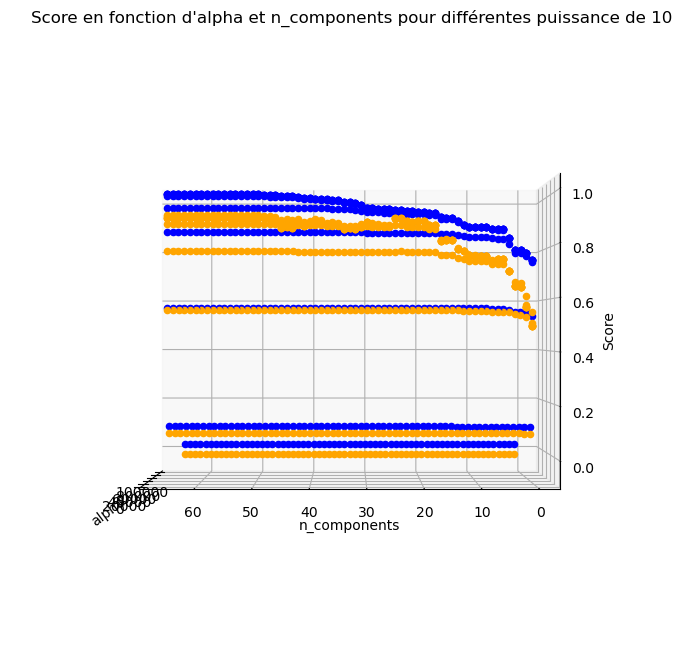

In [102]:
#pour bien reperer l'overfitting et la valeure de NC.
affichage3D_NC_Alpha(0, 180)

In [103]:
#On voit directement que certaines valeurs d'alpha très grandes mettent notre régression en underfitting
#ces valeurs ne vont donc pas être prises en compte.

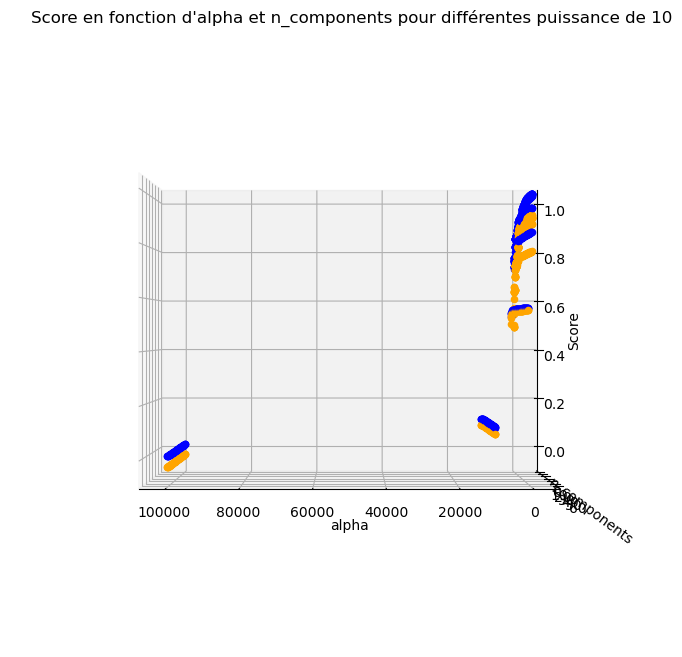

In [104]:
#pour essayer de voir les différentes hauteurs de courbes.
affichage3D_NC_Alpha(0, 90)

In [105]:
#On va filtrer en fonction d'alpha, pour avoir un meilleur aperçu sur les alpha qui nous intéressent.

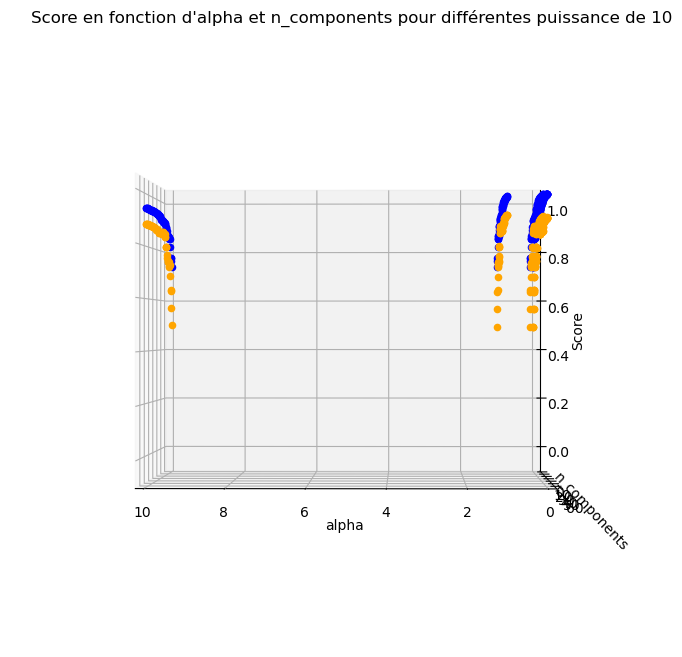

In [106]:
affichage3D_NC_Alpha(0, 91)

In [107]:
#Les alphas semblent bien sur cet encadrement.

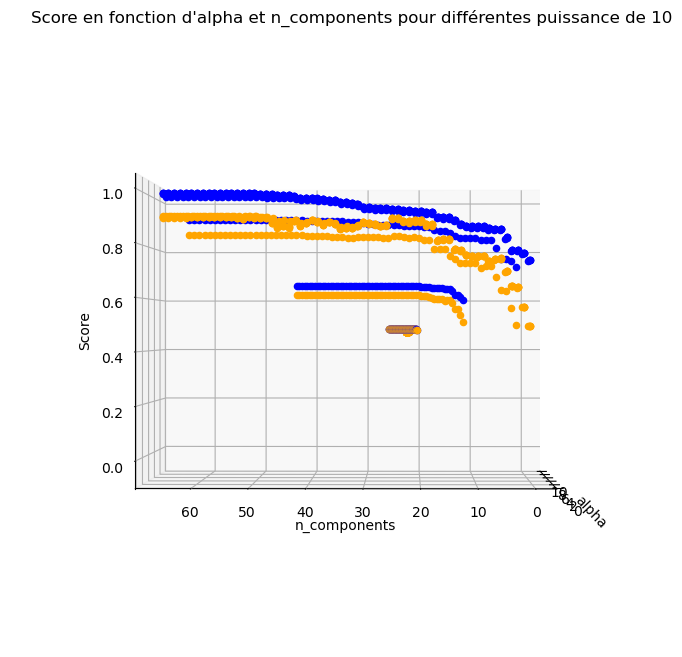

In [108]:
affichage3D_NC_Alpha(0, 181)

In [109]:
#on a xlim sur 0, 10 ici aussi comme ca on voit mieux les courbes, on peut voir que les valeurs
#de n_components les plus adéquates sont entre 15 et 25.

In [110]:
#On s'apercoit donc qu'avec la visualisation 3D que les meilleurs points sont vers 15 et 25 components et pour des alphas entre 0 et 10.

In [111]:
#on va faire un contourf comme dans le TP SVM afin de surtout avoir alpha.

Figure inspirée du TP sur le SVM

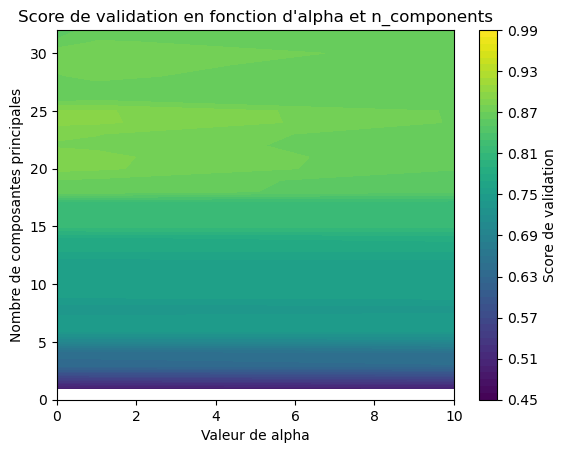

In [112]:
levels=np.arange(0.45, 1, 0.01)

fig_contour = plt.figure()
ax_contour = fig_contour.add_subplot(111)

X, Y = np.meshgrid(alpha_arr, n_components_arr)

cp = ax_contour.contourf(X, Y, ridge_val_scores_arr.reshape(X.shape), levels=levels)

cbar = plt.colorbar(cp)
cbar.ax.set_ylabel('Score de validation')

plt.xlabel('Valeur de alpha')
plt.ylabel('Nombre de composantes principales')
plt.title('Score de validation en fonction d\'alpha et n_components')
plt.ylim([0, 32])#on zoom en enlevant les colonnes ou on  considéré que l'overfitting avait commencé.
plt.xlim([0, 10])#on a remarqué qu'à partir de 4 c'était moins jaune.

plt.show()


On a majorer maintenant on va tenter d'être plus précis et choper les hyperparamètres.

In [113]:
#On peut être plus précis et encadrer entre 20 et 25 pour n_components et de plus on voit que alpha = 10 est tour de même en dessous
#par rapport aux valuers plus petites, ce sera surement pas notre alpha.

In [114]:
#On a majorer maintenant pour être plus précis cherchons le meilleur n_components qu'on a pour ces alphas
#puis ensuite l'alpha adéquat.

Commencons par n_components.

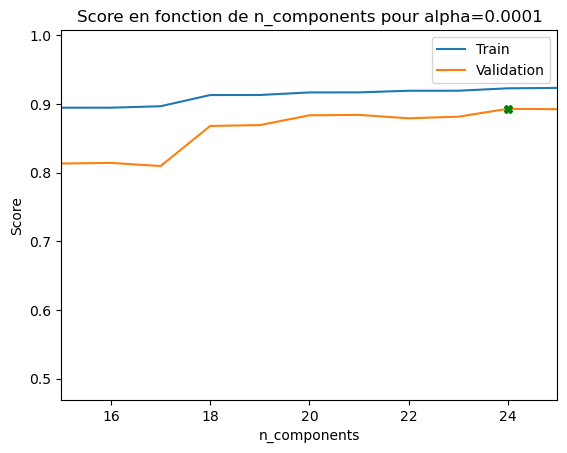

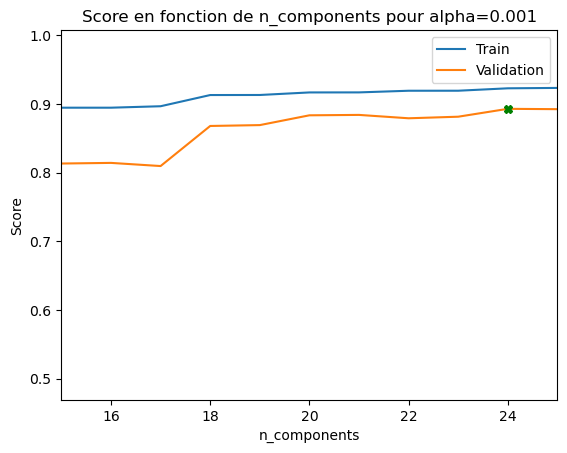

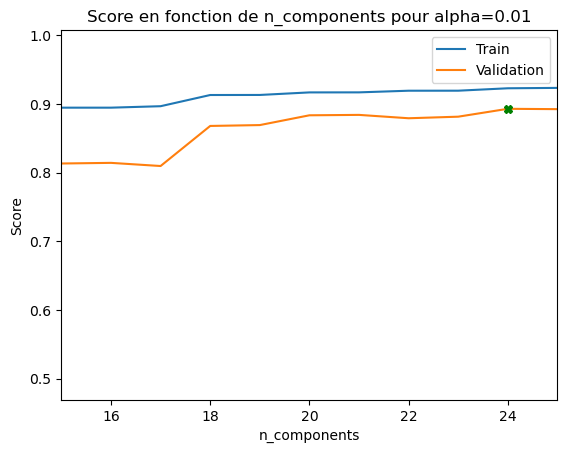

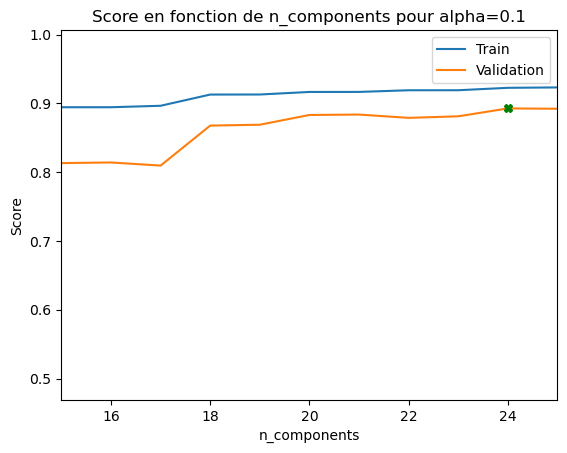

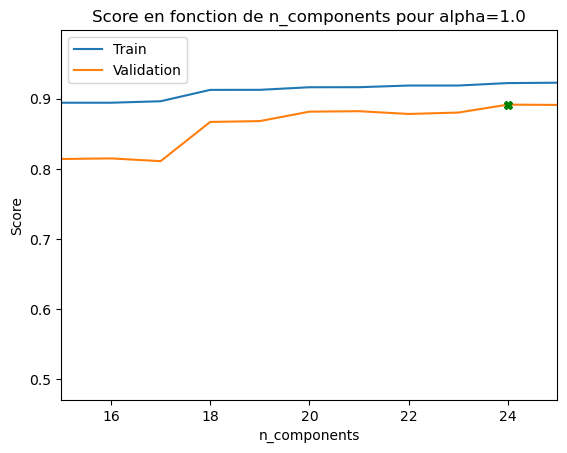

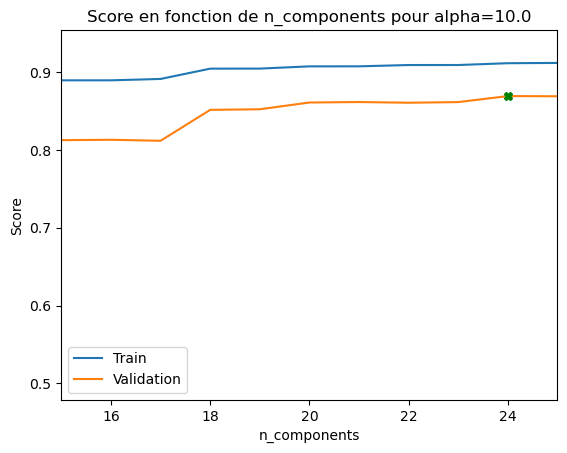

In [115]:
#affichage 2D
max_points = []
for i,alpha in enumerate(alpha_arr[:6]): #enumerate sert pour la version ou on test les puissances de 10 pour alpha.
    train_scores_alpha = train_scores_r_disp[i]
    val_scores_alpha = val_scores_r_disp[i]
    
    plt.plot(n_components_arr, train_scores_alpha, label='Train')
    plt.plot(n_components_arr, val_scores_alpha, label='Validation')
    plt.title(f"Score en fonction de n_components pour alpha={alpha}")
    plt.xlabel('n_components')
    plt.xlim([15, 25])
    plt.ylabel('Score')
    plt.legend()
    
    best_index = np.argmax(val_scores_alpha[:32]) #choix prend en compte l'overfitting et la compléxité du modèle 
    best_n_components = n_components_arr[best_index]
    best_val_score = val_scores_alpha[best_index]
    
    plt.plot(best_n_components, best_val_score, marker='X', color='green')
    max_points.append((best_n_components, best_val_score, alpha))
    
    plt.show()

Maintenant qu'on a n_components on va trouver le bon alpha.

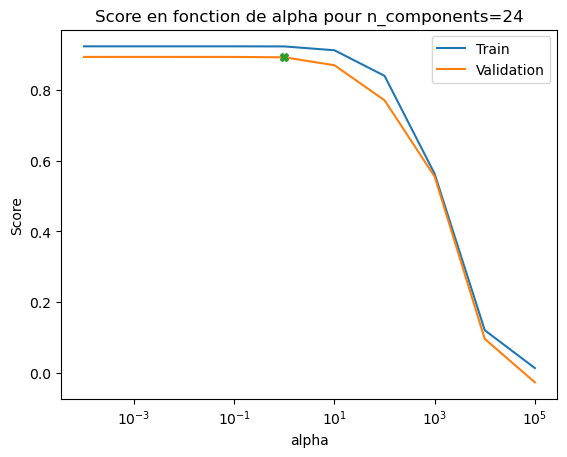

In [116]:
#maintenant analysons alpha pour n_components fixé à 24.
train_scores_24 = []
val_scores_24 = []
alpha_values = []
for i, alpha in enumerate(alpha_arr):
    pca = PCA(n_components=24)
    X_trainval_pca = pca.fit_transform(X_trainval)
    X_val_pca = pca.transform(X_val)

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_trainval_pca, y_trainval)

    train_score = ridge_model.score(X_trainval_pca, y_trainval)
    val_score = ridge_model.score(X_val_pca, y_val)

    train_scores_24.append(train_score)
    val_scores_24.append(val_score)
    alpha_values.append(alpha)

plt.plot(alpha_values, train_scores_24, label='Train')
plt.plot(alpha_values, val_scores_24, label='Validation')
best_val_score_24 = max(val_scores_24[4:])
best_val_score_24_index = val_scores_24.index(best_val_score_24)
plt.plot(alpha_values[best_val_score_24_index], best_val_score_24, 'X', markersize=6)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('Score en fonction de alpha pour n_components=24')
plt.legend()
plt.show()

In [117]:
alpha_values[best_val_score_24_index]

1.0

In [118]:
X_trainval.shape

(123, 74)

In [119]:
###########PCA avec le meilleur n_components

pca = PCA(n_components=24)
pca.fit(X_trainval)

X_trainval_pca = pca.transform(X_trainval)
X_val_pca = pca.transform(X_val)
X_testval_pca = pca.transform(X_testval)

In [120]:
#Ridge avec meilleur alpha
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_trainval_pca, y_trainval)

y_pred_testval_ridge = ridge_model.predict(X_testval_pca)

mse = mean_absolute_error(y_testval, y_pred_testval_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_testval, y_pred_testval_ridge)

print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("R^2 :", ridge_model.score(X_testval_pca, y_testval))

MSE: 0.27
MAE: 0.27
RMSE: 0.52
R^2 : 0.8583337195244987


In [121]:
#Dans l'optimisiation des paramètres, On remarque que le jeu ne vaut pas la chandelle en ce qui concerne 
#l'optimisation par combinaison. Nous allons donc en tenir rigueur pour la cross validation.

<span style="font-size:2em; font-weight:bold;">Ridge Regression avec Cross Validation</span>

In [122]:
train_data, test_data = train_test_split(df_encod, test_size=0.2, random_state=0)

In [123]:
X_train = train_data.drop(target_col, axis=1)
y_train = train_data[target_col]

X_test = test_data.drop(target_col, axis=1) 
y_test = test_data[target_col]

In [124]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((164, 74), (164,), (41, 74), (41,))

<span style="font-size:1.5em; font-weight:bold;">Je l'ai pas dit plus haut mais on a bien fait attention à respecter
l'ordre des choses (la pipeline) c'est à dire SPLIT-> STAND->PCA->MODEL (je précise notamment pour la cross validation)</span>

<span style="font-size:1.25em; font-weight:bold;">On commence par alpha</span>

In [125]:
#on optimise avec LA CV de la même manière qu'avec la Régression Linéaire
alpha_values = np.logspace(-4, 5, num=10)
all_train_scores = {alpha: [] for alpha in alpha_values}
all_val_scores = {alpha: [] for alpha in alpha_values}
final_train_scores = []
final_val_scores = []

pca = PCA(n_components=24)
ridge_model = Ridge()
kfold = KFold(n_splits=5)

for alpha in alpha_values:
    train_scores = []
    val_scores = []

    for train_idx, val_idx in kfold.split(X_train):  
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Concaténation des X et y pour la standardisation.
        train_data_fold = pd.concat([X_train_fold, y_train_fold], axis=1)
        val_data_fold = pd.concat([X_val_fold, y_val_fold], axis=1)

        # Standardisation
        Standardisation(train_data_fold, val_data_fold)

        # Séparation des X et y standardisés
        X_train_std, y_train_std = train_data_fold.drop(target_col, axis=1), train_data_fold[target_col]
        X_val_std, y_val_std = val_data_fold.drop(target_col, axis=1), val_data_fold[target_col]

        # PCA
        pca.fit(X_train_std)
        X_train_pca = pca.transform(X_train_std)
        X_val_pca = pca.transform(X_val_std)

        # Ridge Regression
        ridge_model.set_params(alpha=alpha)
        ridge_model.fit(X_train_pca, y_train_std)
        
        train_score = ridge_model.score(X_train_pca, y_train_std)
        val_score = ridge_model.score(X_val_pca, y_val_std)
        
        train_scores.append(train_score)
        val_scores.append(val_score)

    all_train_scores[alpha] = train_scores
    all_val_scores[alpha] = val_scores

    mean_train_score = np.mean(train_scores)
    mean_val_score = np.mean(val_scores)

    final_train_scores.append(mean_train_score)
    final_val_scores.append(mean_val_score)

# Les scores pour chaque fold de cross-validation sont stockés dans all_train_scores et all_val_scores
# Les scores d'entraînement et de validation finaux sont stockés dans final_train_scores et final_val_scores

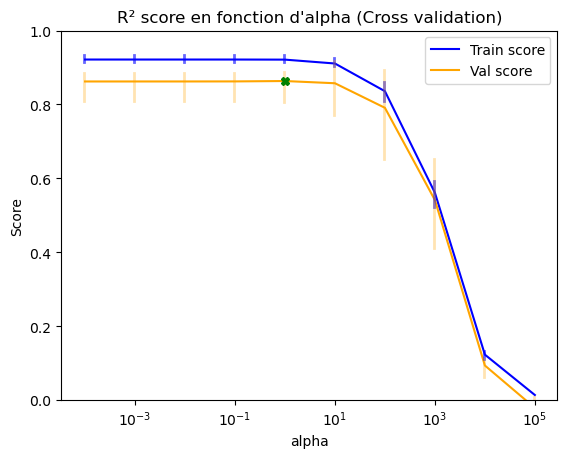

In [126]:
alphas = np.logspace(-4, 5, num=10)
plt.plot(alphas, final_train_scores, label='Train score', color='blue')
plt.plot(alphas, final_val_scores, label='Val score', color='orange')

# Ajout des lignes verticales uniques pour les scores de chaque fold
for idx, alpha in enumerate(alphas):
    min_train_score, max_train_score = min(all_train_scores[alpha]), max(all_train_scores[alpha])
    min_val_score, max_val_score = min(all_val_scores[alpha]), max(all_val_scores[alpha])

    plt.plot([alpha*0.95, alpha*0.95], [min_train_score, max_train_score], color='blue', alpha=0.6, linewidth=2)
    plt.plot([alpha*0.95, alpha*0.95], [min_val_score, max_val_score], color='orange', alpha=0.3, linewidth=2)

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('R² score en fonction d\'alpha (Cross validation)')
plt.ylim([0, 1])

bestIndex = np.argmax(final_val_scores)
bestAlpha = alphas[bestIndex]
plt.plot(bestAlpha, final_val_scores[bestIndex], marker='X', color='green')

plt.legend()
plt.show()

In [127]:
bestAlpha,

(1.0,)

In [128]:
#On a pris le point où on risque le moint l'overfitting en prennant en compte la répartition des scores de la cv
#il faut pas voir alpha comme n_components car justement plus alpha est grand moins on risque d'overfitter, donc le meilleur point est forcément
#le plus grand où on a le score le plus haut.

In [129]:
#On a fixé alpha, maintenant tentons de fixer n_components.

<span style="font-size:1.25em; font-weight:bold;">Ensuite n_components</span>

In [130]:
n_components_range = range(1, max_n_components+1)
alpha = 1

all_train_scores = {n: [] for n in n_components_range}
all_val_scores = {n: [] for n in n_components_range}
final_train_scores = []
final_val_scores = []

ridge_model = Ridge(alpha=alpha)
kfold = KFold(n_splits=5)

for n_components in n_components_range:
    train_scores = []
    val_scores = []

    for train_idx, val_idx in kfold.split(X_train):  
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Concaténation des X et y pour la standardisation.
        train_data_fold = pd.concat([X_train_fold, y_train_fold], axis=1)
        val_data_fold = pd.concat([X_val_fold, y_val_fold], axis=1)

        # Standardisation
        Standardisation(train_data_fold, val_data_fold)

        # Séparation des X et y standardisés
        X_train_std, y_train_std = train_data_fold.drop(target_col, axis=1), train_data_fold[target_col]
        X_val_std, y_val_std = val_data_fold.drop(target_col, axis=1), val_data_fold[target_col]

        # PCA
        pca = PCA(n_components=n_components)
        pca.fit(X_train_std)
        X_train_pca = pca.transform(X_train_std)
        X_val_pca = pca.transform(X_val_std)

        # Ridge Regression
        ridge_model.fit(X_train_pca, y_train_std)
        
        train_score = ridge_model.score(X_train_pca, y_train_std)
        val_score = ridge_model.score(X_val_pca, y_val_std)
        
        train_scores.append(train_score)
        val_scores.append(val_score)

    all_train_scores[n_components] = train_scores
    all_val_scores[n_components] = val_scores

    mean_train_score = np.mean(train_scores)
    mean_val_score = np.mean(val_scores)

    final_train_scores.append(mean_train_score)
    final_val_scores.append(mean_val_score)

# Les scores pour chaque fold de cross-validation sont stockés dans all_train_scores et all_val_scores
# Les scores d'entraînement et de validation finaux sont stockés dans final_train_scores et final_val_scores

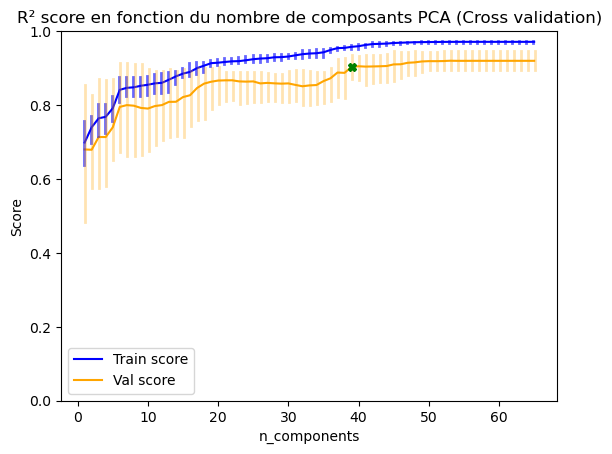

In [131]:
plt.plot(n_components_range, final_train_scores, label='Train score', color='blue')
plt.plot(n_components_range, final_val_scores, label='Val score', color='orange')

for idx, n_components in enumerate(n_components_range):
    min_train_score, max_train_score = min(all_train_scores[n_components]), max(all_train_scores[n_components])
    min_val_score, max_val_score = min(all_val_scores[n_components]), max(all_val_scores[n_components])

    plt.plot([n_components - 0.1, n_components - 0.1], [min_train_score, max_train_score], color='blue', alpha=0.6, linewidth=2)
    plt.plot([n_components + 0.1, n_components + 0.1], [min_val_score, max_val_score], color='orange', alpha=0.3, linewidth=2)

plt.xlabel('n_components')
plt.ylabel('Score')
plt.title('R² score en fonction du nombre de composants PCA (Cross validation)')
plt.ylim([0, 1])

bestIndex = np.argmax(final_val_scores[:39])
best_n_components = n_components_range[bestIndex]
plt.plot(best_n_components, final_val_scores[bestIndex], marker='X', color='green')

plt.legend()
plt.show()

In [132]:
best_n_components

39

<span style="font-size:1.25em; font-weight:bold;">Déploiement du modèle</span>

In [133]:
#c'est le point qui a moins de variance vers le bas et celui qui a la plus petite absciesse des scores les plus hauts.

In [134]:
#On standardise pour faire le pca.
Standardisation(train_data, test_data)

X_train = train_data.drop(target_col, axis=1)
y_train = train_data[target_col]

X_test = test_data.drop(target_col, axis=1) 
y_test = test_data[target_col]

In [135]:
#On véridie que c'est standardisé.
X_train.head(1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mark=nissan,mark=peugeot,mark=plymouth,mark=porsche,mark=renault,mark=saab,mark=subaru,mark=toyota,mark=volkswagen,mark=volvo
4,1.007738,0.079903,0.170321,0.230423,0.202318,0.47466,0.211194,-0.533177,0.468392,-0.545599,...,0,0,0,0,0,0,0,0,0,0


In [136]:
pca = PCA(n_components=best_n_components)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [137]:
X_train_pca.shape, X_test_pca.shape

((164, 39), (41, 39))

In [138]:
#Ridge avec meilleur alpha
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_pca, y_train)

y_pred_test_ridge = ridge_model.predict(X_test_pca)

ridgecv_mse = mean_absolute_error(y_test, y_pred_test_ridge)
ridgecv_rmse = np.sqrt(mse)
ridgecv_mae = mean_absolute_error(y_test, y_pred_test_ridge)
ridgecv_score = ridge_model.score(X_test_pca, y_test)

print("MSE: {:.2f}".format(ridgecv_mse))
print("MAE: {:.2f}".format(ridgecv_mae))
print("RMSE: {:.2f}".format(ridgecv_rmse))
print("R^2 :", ridge_model.score(X_test_pca, y_test))

MSE: 0.26
MAE: 0.26
RMSE: 0.52
R^2 : 0.872167203958498


<span style="font-size:2em; font-weight:bold;">Implémentation du modèle Ridge</span>

On va implémenter notre modèle de Ridge Regression en l'alliant avec la descente de gradient.
On a donc du dériver d'une nouvelle manière le gradient car maintenant il y a la somme
des (coefficients au carré) à dériver.

In [139]:
#Descente de gradient sur une itération, elle met à jour les coefficients.
def gradient_descent(X, y, theta, alpha, eta):
    n = X.shape[0]
    y_pred = predict(X, theta)
    
    theta[1:] -= eta * ((1/n) * np.dot(X.T, (y_pred - y)) + alpha * 2 * theta[1:])
    theta[0] -= eta * (1/n) * np.sum(y_pred - y)
    return theta

#le fit, renvoie le cout et teta 
def train(X, y, alpha, eta, epochMax):
    theta = np.zeros(X.shape[1] + 1) #on oublie pas de rajouter le biais ( [a a1 ... b]. [ x .. x1 .. 1 ..1]))
    costs = []  #on stocke le cout pout optiiser les Paramètres.
    n = X.shape[0]
    
    # Descente de gradient.
    for epoch in range(epochMax):
        #Mise à jour des coefficients
        theta = gradient_descent(X, y, theta, alpha, eta)
        #Calcul du coût
        y_pred = predict(X, theta)
        cost = np.sum((y_pred - y)**2) / (2 * n) + alpha * np.sum(theta[1:]**2)
        costs.append(cost)
    
    return theta, costs

#application du modèle.
def predict(X, theta):
    return np.dot(X, theta[1:]) + theta[0]


#Exemple afin de comparer 
X = np.random.randn(100, 3)
y = np.random.randn(100)
alpha = 0.1
eta = 0.08
epochMax = 200

#theta[0] représente intercept 
theta, costs = train(X, y, alpha, eta, epochMax)
print("Coefficients theta :", theta)

#comparaison avec le Ridge de sklearn on remarque qu'on retrouve des coefficients équivalents.
ridge_model = Ridge(alpha=2)
ridge_model.fit(X, y, alpha)
print (ridge_model.intercept_, ridge_model.coef_)

Coefficients theta : [ 0.01607565  0.0450343  -0.10318764  0.13056567]
0.016075651576416793 [ 0.04503429 -0.10318764  0.13056567]


On retrouve les mêmes coefficients donc paas d'erreur dans notre régression.

<span style="font-size:1.25em; font-weight:bold;">Optimisation des paramètres epochMax et Eta </span>

On optimise les paramètres sur l'entrainement et surtout on le fait avec alpha=0 (une LR quoi) c'est alpha qui s'adapte au paramètres pas l'inverse.

In [140]:
train_data, test_data = train_test_split(df_encod, test_size=0.2, random_state=0)

In [141]:
Standardisation(train_data, test_data)

In [142]:
X_train = train_data.drop(target_col, axis=1)
y_train = train_data[target_col]

X_test = test_data.drop(target_col, axis=1) 
y_test = test_data[target_col]

In [143]:
#arbitraire juste pour optimiser les paramètres.
pca = PCA(n_components=40)
X_train_pca =pca.fit_transform(X_train)

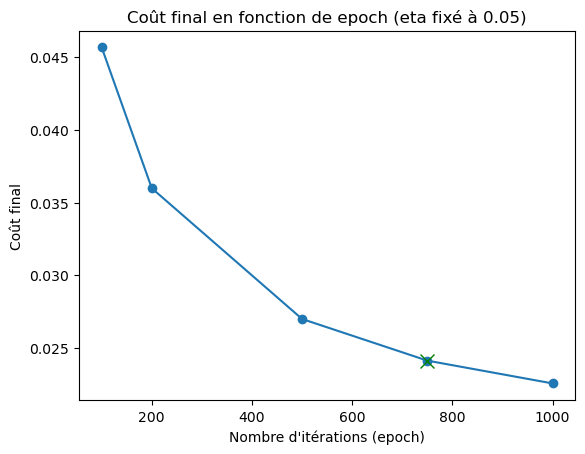

In [144]:
fixed_eta = 0.05
epoch_values = [ 100 ,200, 500, 750, 1000]
costs_fixed_eta = []

for epoch in epoch_values:
    coef, costs = train(X_train_pca, y_train, 0, fixed_eta, epoch)
    costs_fixed_eta.append(costs[-1])

# Tracer la courbe
plt.plot(epoch_values, costs_fixed_eta, marker='o')
plt.title("Coût final en fonction de epoch (eta fixé à {})".format(fixed_eta))
plt.xlabel("Nombre d'itérations (epoch)")
plt.ylabel("Coût final")
bestI = np.argmin(costs_fixed_eta[:4])

plt.plot(epoch_values[bestI], costs_fixed_eta[bestI], marker='x',markersize=10, color='green')
plt.show()

In [145]:
#On voit qu'à partir de 750 itérations c'est bon.

In [146]:
costs_fixed_eta

[0.04566837245150543,
 0.03598081680849712,
 0.02698878735579386,
 0.024124842587140528,
 0.02255754826222322]

In [147]:
best_epoch = epoch_values[bestI] 
best_epoch

750

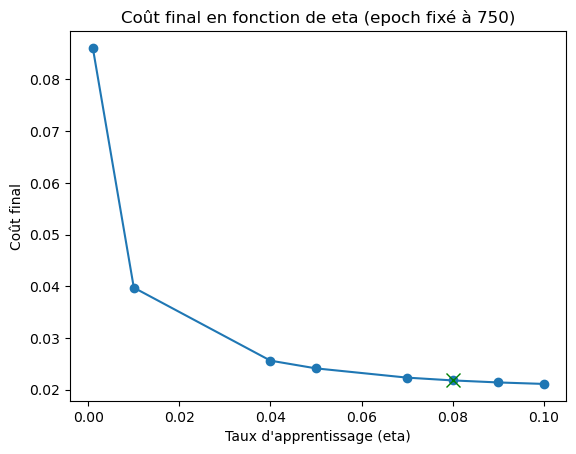

In [148]:
fixed_epoch = 750
eta_values = [0.001, 0.01, 0.04, 0.05, 0.07, 0.08, 0.09, 0.1 ]
costs_fixed_epoch = []

for eta in eta_values:
    coef, costs = train(X_train_pca, y_train, 0, eta, fixed_epoch)
    costs_fixed_epoch.append(costs[-1])

min_index = np.argmin(costs_fixed_epoch[:6])
min_cost = costs_fixed_epoch[min_index]
min_eta = eta_values[min_index]

plt.plot(eta_values, costs_fixed_epoch, marker='o')
plt.title("Coût final en fonction de eta (epoch fixé à {})".format(fixed_epoch))
plt.xlabel("Taux d'apprentissage (eta)")
plt.ylabel("Coût final")

# Marquer le point le plus bas avec une croix verte
plt.plot(min_eta, min_cost, marker='x', markersize=10, color='green')

plt.show()

In [149]:
min_eta

0.08

In [150]:
costs_fixed_epoch

[0.08608891987930105,
 0.03973345330234431,
 0.025617964606615473,
 0.024124842587140528,
 0.02233504697755857,
 0.021797040333281392,
 0.02140543296151551,
 0.021118550704157732]

In [151]:
#Remarque on en choisit un pas trop petit et pas trop grand, on voit que c'est à partir de 0.04 que le pas 
#On va donc prendre un pas de 0.08 car ca décolle à partir de 0.1, on laisse une marge d'erreur mais on prend
#un pas assez grand pour simplifier le calcul.

In [152]:
#paramètres de régression optimisé
epoch = best_epoch
eta = min_eta

<span style="font-size:1.25em; font-weight:bold;">Comparaison avec sklearn</span>

In [153]:
sample_sizes = [50, 100, 200]
num_samples = 10 

abs_errors = []
for n in sample_sizes:
    for i in range(num_samples):
        X = np.random.randn(n, 1)
        y = np.random.randn(n)

        theta, _ = train(X, y, 1, eta, epoch)
        
        ridge_model = Ridge(alpha=4)
        ridge_model.fit(X, y)

        my_theta = np.array([theta[0]] + list(theta[1:]))
        sklearn_theta = np.array([ridge_model.intercept_] + list(ridge_model.coef_))

        # Calcul de l'erreur absolue entre les coefficients
        abs_error = np.mean(np.abs(my_theta - sklearn_theta))
        abs_errors.append(abs_error)

# Calcul de l'erreur absolue moyenne pour tous les échantillons
mean_abs_error = np.mean(abs_errors)

mean_abs_error

0.03228611236804376

In [154]:
#Surement du aux choix des paramètres, mais c'est déjà bien (c'est pour un eta fixe et relativement faible).
#Intéressons nous à un eta relativement plus élevé.

In [155]:
#Beaucoup de code mais c'est juste une cross validation sur notre modèle et celui du sklearn pour comparer. 
alpha_values = [0, 0.001, 0.01, 0.1, 1]
all_train_scores = {alpha: [] for alpha in alpha_values}
all_val_scores = {alpha: [] for alpha in alpha_values}
final_train_scores = []
final_val_scores = []
final_train_scores_sklearn = []
final_val_scores_sklearn = []
final_train_costs = []
final_val_costs = []
final_train_costs_sklearn = []
final_val_costs_sklearn = []

pca = PCA(n_components=40)
kfold = KFold(n_splits=5)

for alpha in alpha_values:
    train_scores = []
    val_scores = []
    sklearn_train_scores = []
    sklearn_val_scores = []

    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        train_data_fold = pd.concat([X_train_fold, y_train_fold], axis=1)
        val_data_fold = pd.concat([X_val_fold, y_val_fold], axis=1)

        Standardisation(train_data_fold, val_data_fold)

        X_train_std, y_train_std = train_data_fold.drop(target_col, axis=1), train_data_fold[target_col]
        X_val_std, y_val_std = val_data_fold.drop(target_col, axis=1), val_data_fold[target_col]

        pca.fit(X_train_std)
        X_train_pca = pca.transform(X_train_std)
        X_val_pca = pca.transform(X_val_std)

        # Entraînement avec votre implémentation
        theta, _ = train(X_train_pca, y_train_std, alpha, eta, epoch)

        # Prédiction avec votre implémentation
        y_train_pred = predict(X_train_pca, theta)
        y_val_pred = predict(X_val_pca, theta)

        # Calcul des scores avec votre implémentation
        train_score = r2_score(y_train_std, y_train_pred)
        val_score = r2_score(y_val_std, y_val_pred)

        train_scores.append(train_score)
        val_scores.append(val_score)

        # Entraînement avec scikit-learn
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_pca, y_train_std)

        # Prédiction avec scikit-learn
        sklearn_y_train_pred = ridge_model.predict(X_train_pca)
        sklearn_y_val_pred = ridge_model.predict(X_val_pca)

        # Calcul des scores avec scikit-learn
        sklearn_train_score = r2_score(y_train_std, sklearn_y_train_pred)
        sklearn_val_score = r2_score(y_val_std, sklearn_y_val_pred)

        sklearn_train_scores.append(sklearn_train_score)
        sklearn_val_scores.append(sklearn_val_score)
        
        train_cost = mean_squared_error(y_train_std, y_train_pred)
        val_cost = mean_squared_error(y_val_std, y_val_pred)
        sklearn_train_cost = mean_squared_error(y_train_std, sklearn_y_train_pred)
        sklearn_val_cost = mean_squared_error(y_val_std, sklearn_y_val_pred)

    all_train_scores[alpha] = train_scores
    all_val_scores[alpha] = val_scores

    mean_train_score = np.mean(train_scores)
    mean_val_score = np.mean(val_scores)
    sklearn_mean_train_score = np.mean(sklearn_train_scores)
    sklearn_mean_val_score = np.mean(sklearn_val_scores)

    final_train_scores.append(mean_train_score)
    final_val_scores.append(mean_val_score)
    final_train_scores_sklearn.append(sklearn_mean_train_score)
    final_val_scores_sklearn.append(sklearn_mean_val_score)
    final_train_costs.append(np.mean(train_cost))
    final_val_costs.append(np.mean(val_cost))
    final_train_costs_sklearn.append(np.mean(sklearn_train_cost))
    final_val_costs_sklearn.append(np.mean(sklearn_val_cost))


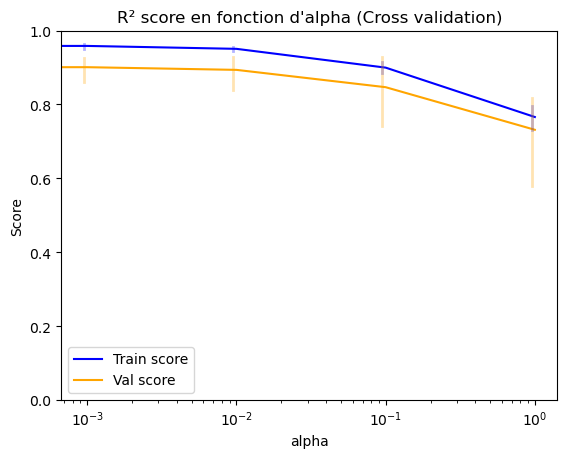

In [156]:
alphas = alpha_values
plt.plot(alphas, final_train_scores, label='Train score', color='blue')
plt.plot(alphas, final_val_scores, label='Val score', color='orange')

# Ajout des lignes verticales uniques pour les scores de chaque fold
for idx, alpha in enumerate(alphas):
    min_train_score, max_train_score = min(all_train_scores[alpha]), max(all_train_scores[alpha])
    min_val_score, max_val_score = min(all_val_scores[alpha]), max(all_val_scores[alpha])

    plt.plot([alpha * 0.95, alpha * 0.95], [min_train_score, max_train_score], color='blue', alpha=0.3, linewidth=2)
    plt.plot([alpha * 0.95, alpha * 0.95], [min_val_score, max_val_score], color='orange', alpha=0.3, linewidth=2)

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title("R² score en fonction d'alpha (Cross validation)")
plt.ylim([0, 1])

bestIndex = np.argmax(final_val_scores)
bestAlpha = alphas[bestIndex]
plt.plot(bestAlpha, final_val_scores[bestIndex], marker='X', color='green')

plt.legend()
plt.show()

In [157]:
#On remarque une bonne tendance mais une pénalisation qui semble un peu trop forte.

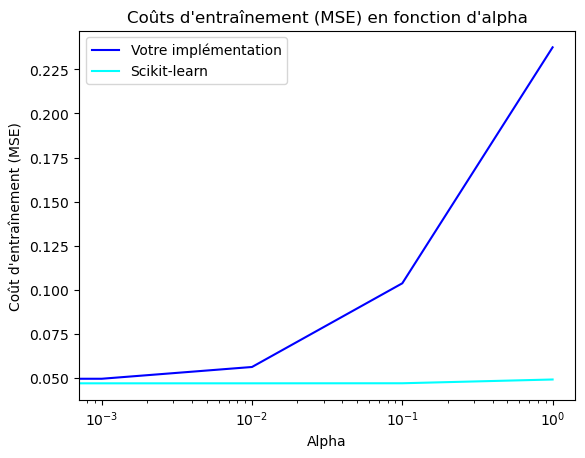

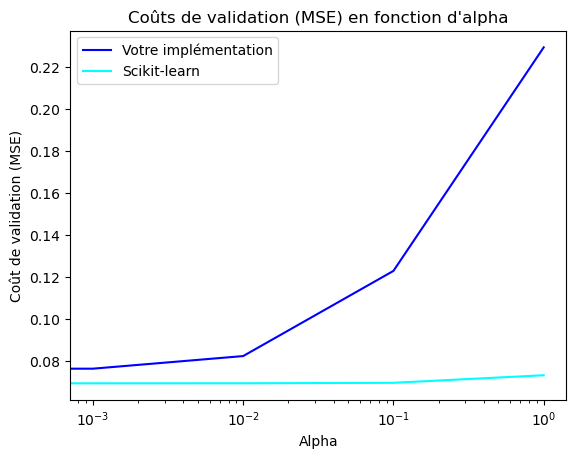

In [158]:
plt.plot(alpha_values, final_train_costs, label='Votre implémentation', color='blue')
plt.plot(alpha_values, final_train_costs_sklearn, label='Scikit-learn', color='cyan')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel("Coût d'entraînement (MSE)")
plt.title("Coûts d'entraînement (MSE) en fonction d'alpha")
plt.legend()
plt.show()

# Créez le deuxième graphique pour les coûts de validation
plt.plot(alpha_values, final_val_costs, label='Votre implémentation', color='blue')
plt.plot(alpha_values, final_val_costs_sklearn, label='Scikit-learn', color='cyan')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel("Coût de validation (MSE)")
plt.title("Coûts de validation (MSE) en fonction d'alpha")
plt.legend()
plt.show()

In [159]:
#l'erreur augmente exponentiellement par rapport à celle de scikeatlearn.

In [160]:
#On remarque que notre Ridge minimise moins la fonction, et ca s'arrange pas avec alpha, on remarque qu'on est déjà
#en underfitting à alpha = 1 alors que dans la version de scikeat on ca chute à partir de 1e-2.
#En effet scikeatlearn utilise des méthodes plus sofistiquées que la méthode de gradient.

<span style="font-size:2em; font-weight:bold;">Comparaison des modèles</span>

In [161]:
#!pip install tabulate #Si vous n'avez pas la bibilothéque décommentez.

In [162]:
from tabulate import tabulate

data = {'Méthode': ['LinearRegression', 'Ridge'],
        'MSE': [regcv_mse, ridgecv_mse],
        'RMSE': [regcv_rmse, ridgecv_rmse],
        'MAE': [regcv_mae, ridgecv_mae],
        'R2 Score': [regcv_score, ridgecv_score]}

metrics_df = pd.DataFrame(data)
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════╤══════════╤══════════╤══════════╤════════════╕
│    │ Méthode          │      MSE │     RMSE │      MAE │   R2 Score │
╞════╪══════════════════╪══════════╪══════════╪══════════╪════════════╡
│  0 │ LinearRegression │ 0.153805 │ 0.523491 │ 0.256895 │   0.880005 │
├────┼──────────────────┼──────────┼──────────┼──────────┼────────────┤
│  1 │ Ridge            │ 0.262152 │ 0.524322 │ 0.262152 │   0.872167 │
╘════╧══════════════════╧══════════╧══════════╧══════════╧════════════╛


In [163]:
data = {'LinearRegression': [regcv_mse, regcv_rmse, regcv_mae, regcv_score],
        'Ridge': [ridgecv_mse, ridgecv_rmse, ridgecv_mae, ridgecv_score]}

index = ['MSE', 'RMSE', 'MAE', 'R2 Score']

metrics_df = pd.DataFrame(data, index=index)
print(metrics_df)

          LinearRegression     Ridge
MSE               0.153805  0.262152
RMSE              0.523491  0.524322
MAE               0.256895  0.262152
R2 Score          0.880005  0.872167


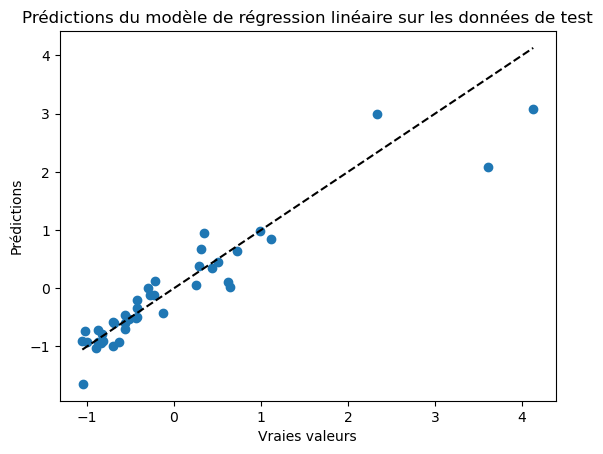

In [164]:
plt.scatter(y_test, y_pred_test_regcv)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions du modèle de régression linéaire sur les données de test')
plt.show()

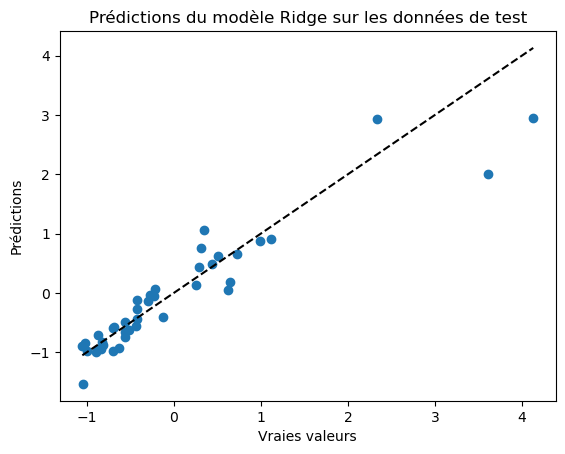

In [165]:
plt.scatter(y_test, y_pred_test_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions du modèle Ridge sur les données de test')
plt.show()

<span style="font-size:2em; font-weight:bold;">Conclusion</span>

On retrouve des données assez linéaires comme prévu. Ce projet à le mérite d'être assez complet on retrouve toute la piepline
vu en cours et en TP, du data cleaning au déploiement du modèle en passant par le pré-processing. On retrouve pas mal
d'optimisation de paramètres, en témoigne les nombreuses figures qui ont le mérite d'être claire. 
De plus, on a implémenté nous-même quelques algorithmes tels quue le OneHot la Standardisation Ridge et le principe de 
cross_validation. Ce projet est un bon support et une belle conclusion de ce que l'on a appris cette année.